In [2]:
def get_box_by_center(center, box_size):
    box_W = box_size[0]
    box_H = box_size[1]
    top_left = [center[0]-box_W//2, center[1]-box_H//2]
    btm_right = [center[0]+box_W//2, center[1]+box_H//2]
    return top_left, btm_right

#assume box is square, obj_W using averages['Car']
def depth_to_obj_pixel_W(depth, img_W, obj_W, cam_to_img):
    #fovx = 2 * np.arctan(img_W / (2 * cam_to_img[0][0]))
    tan_fovx_over2 = img_W / (2 * cam_to_img[0][0])
    #object_pixel_w = img_W * obj_W / (2 * depth * tan_fovx_over2 )
    #object_pixel_w = img_W * obj_W / (2 * depth *img_W / (2 * cam_to_img[0][0]))
    object_pixel_w =  obj_W * (cam_to_img[0][0]) / depth #畫簡之後 不需要img_W
    return object_pixel_w



array([1.52608343, 1.62858987, 3.88395449])

out of img y-axis:757 depth:1
y-axis:328 depth:4
y-axis:267 depth:7
y-axis:242 depth:10
y-axis:229 depth:13
y-axis:221 depth:16
y-axis:215 depth:19
y-axis:211 depth:22
y-axis:208 depth:25
y-axis:205 depth:28
y-axis:203 depth:31
y-axis:202 depth:34
y-axis:200 depth:37
y-axis:199 depth:40
y-axis:198 depth:43
y-axis:197 depth:46
y-axis:196 depth:49
y-axis:196 depth:52
y-axis:195 depth:55
y-axis:195 depth:58


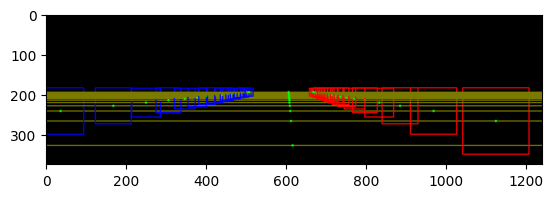

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from library.File import *
from library.Plotting import *
from torch_lib.ClassAverages import *

COLORS = [(255,0,0), (0,255,0), (0,0,255)] # RGB
averages = ClassAverages()
Dimension = averages.get_item('Car') # height, width, length
blank = np.zeros((375,1242,3), dtype=int) #375, 1242, 3
img_H = blank.shape[0]
img_W = blank.shape[1]
cam_to_img = get_P('camera_cal/calib_cam_to_cam.txt') #用calib的也行
fovx = 2 * np.arctan(img_W / (2 * cam_to_img[0][0])) #radian
# 2*tan(fovx/2) = img_W/cam_to_img[0][0]
for depth in [i for i in range(1, 60, 3)]:
    calc_obj_pixel = round(depth_to_obj_pixel_W(depth, img_W, Dimension[1], cam_to_img))
    box_size = [calc_obj_pixel, calc_obj_pixel] #assume square-2dbox
    
    location = [0, 0.8, depth]
    d3_center = project_3d_pt(location, cam_to_img)
    pos_y = d3_center[1]
    cv2.line(blank, (0, pos_y), (img_W-1, pos_y), (122,122,0), 2)
    cv2.circle(blank, d3_center, 3, COLORS[depth%3], -1)
    #print('CENTER',d3_center)
    # Left
    location = [-8, 0.8, depth]
    d3_center = project_3d_pt(location, cam_to_img)
    #print('Left', d3_center)
    cv2.circle(blank, d3_center, 3, COLORS[depth%3], -1)
    top_left, btm_right = get_box_by_center(d3_center, box_size)
    cv2.rectangle(blank, top_left, btm_right, (0,0,255), 2)
    # Right
    location = [+5, 0.8, depth]
    d3_center = project_3d_pt(location, cam_to_img)
    #print('Right', d3_center)
    cv2.circle(blank, d3_center, 3, COLORS[depth%3], -1)
    top_left, btm_right = get_box_by_center(d3_center, box_size)
    cv2.rectangle(blank, top_left, btm_right, (255,0,0), 2)
    
    if pos_y <= img_H:
        print(f'y-axis:{pos_y} depth:{depth}')
    else:
        print(f'out of img y-axis:{pos_y} depth:{depth}')

plt.imshow(blank)
plt.show()